# Transition Energy Model

Análise de dados relacionado a transição energetica, criação dos grafícos para visualização dos dados e criação de modelo de machine learning para realizar predições.


## 1. Instalando dependencias


In [8]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install pickle 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


## 2. Importando bibliotecas


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import numpy as np
import pickle
from api.utils.utils import check_folder, create_folder

## 3. Carregando base de dados


In [10]:
data = pd.read_csv("./data/energy_data.csv")
data.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


## 4. Limpeza e tratamento dos dados:


In [11]:
data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                3065 non-null   int64  
 1   Month                               3065 non-null   int64  
 2   Sector                              3065 non-null   object 
 3   Hydroelectric Power                 3065 non-null   float64
 4   Geothermal Energy                   3065 non-null   float64
 5   Solar Energy                        3065 non-null   float64
 6   Wind Energy                         3065 non-null   float64
 7   Wood Energy                         3065 non-null   float64
 8   Waste Energy                        3065 non-null   float64
 9   Fuel Ethanol, Excluding Denaturant  3065 non-null   float64
 10  Biomass Losses and Co-products      3065 non-null   float64
 11  Biomass Energy                      3065 no

# Gráficos Analisando a Transição Energética


## Comparação entre Fontes de Energia


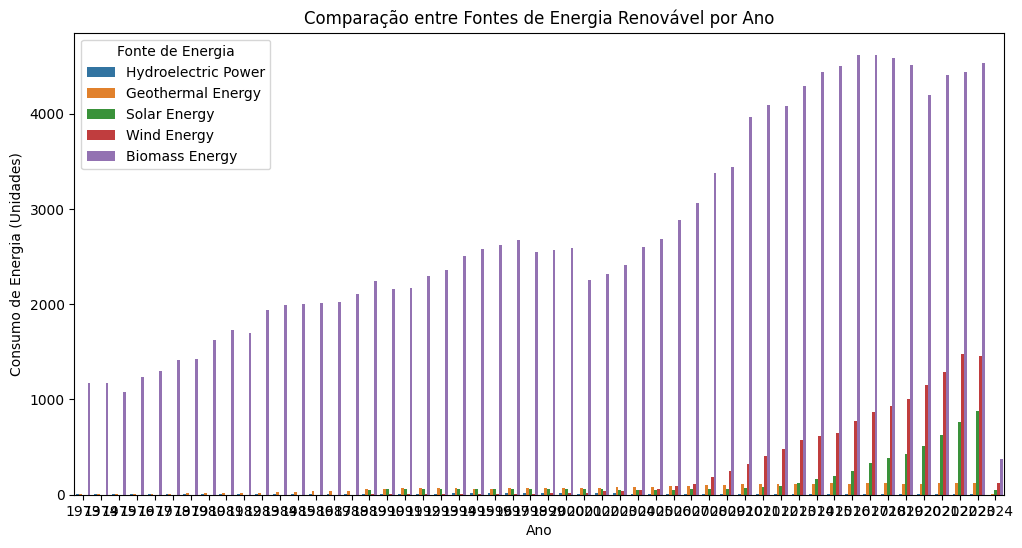

In [12]:
plt.figure(figsize=(12, 6))
fontes = ['Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Biomass Energy']

# Somar o consumo anual de cada fonte
data_ano = data.groupby('Year')[fontes].sum().reset_index()

# Transformar o dataframe para o formato "long" para o Seaborn
data_long = data_ano.melt(id_vars='Year', value_vars=fontes, var_name='Fonte', value_name='Consumo')

sns.barplot(data=data_long, x='Year', y='Consumo', hue='Fonte')
plt.title('Comparação entre Fontes de Energia Renovável por Ano')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia (Unidades)')
plt.legend(title='Fonte de Energia')
plt.show()

## Crescimento no uso de veículos elétricos:


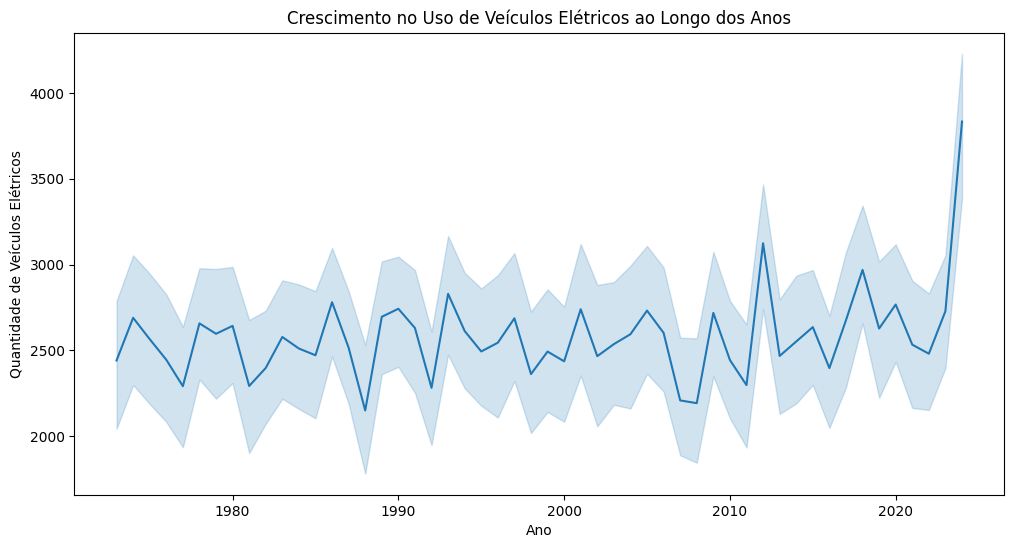

In [13]:
data['Electric Vehicles'] = np.random.randint(100, 5000, size=len(data))

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='Electric Vehicles')
plt.title('Crescimento no Uso de Veículos Elétricos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Veículos Elétricos')
plt.show()


## Distribuição das Fontes de Energia em Setores


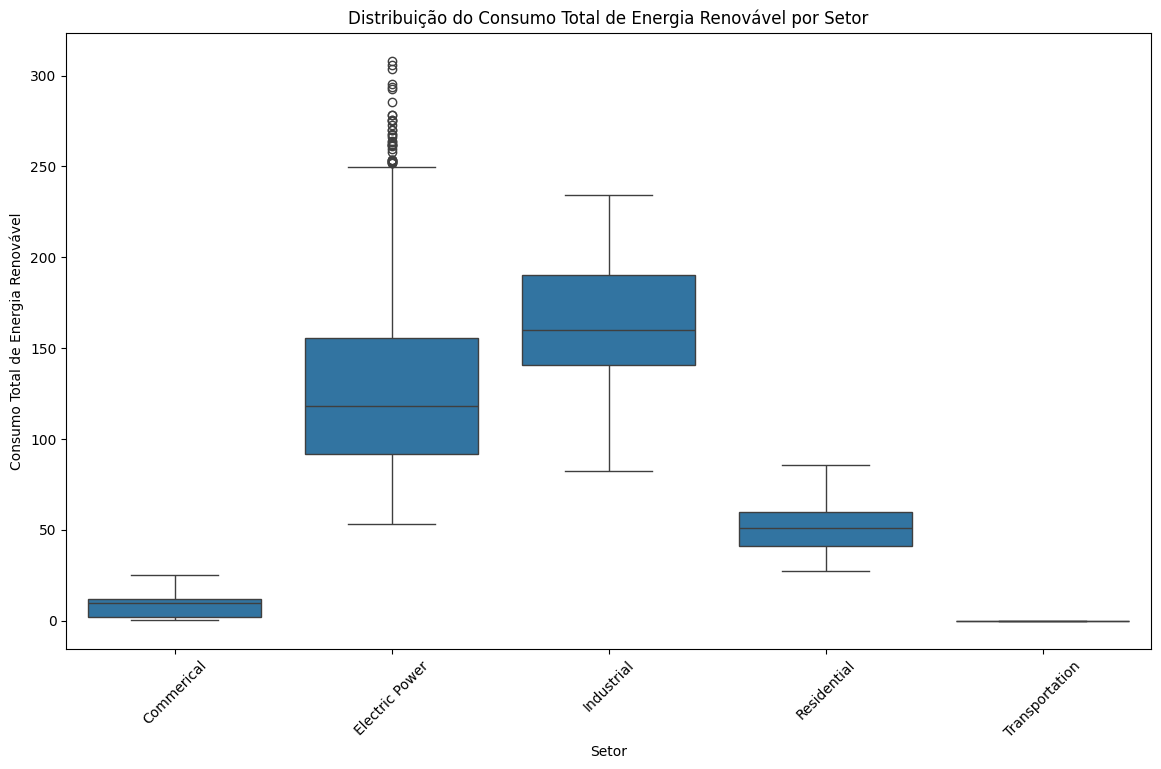

In [14]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Sector', y='Total Renewable Energy')
plt.title('Distribuição do Consumo Total de Energia Renovável por Setor')
plt.xlabel('Setor')
plt.ylabel('Consumo Total de Energia Renovável')
plt.xticks(rotation=45)
plt.show()

## Análise de Correlação Completa para todas as Fontes de Energia


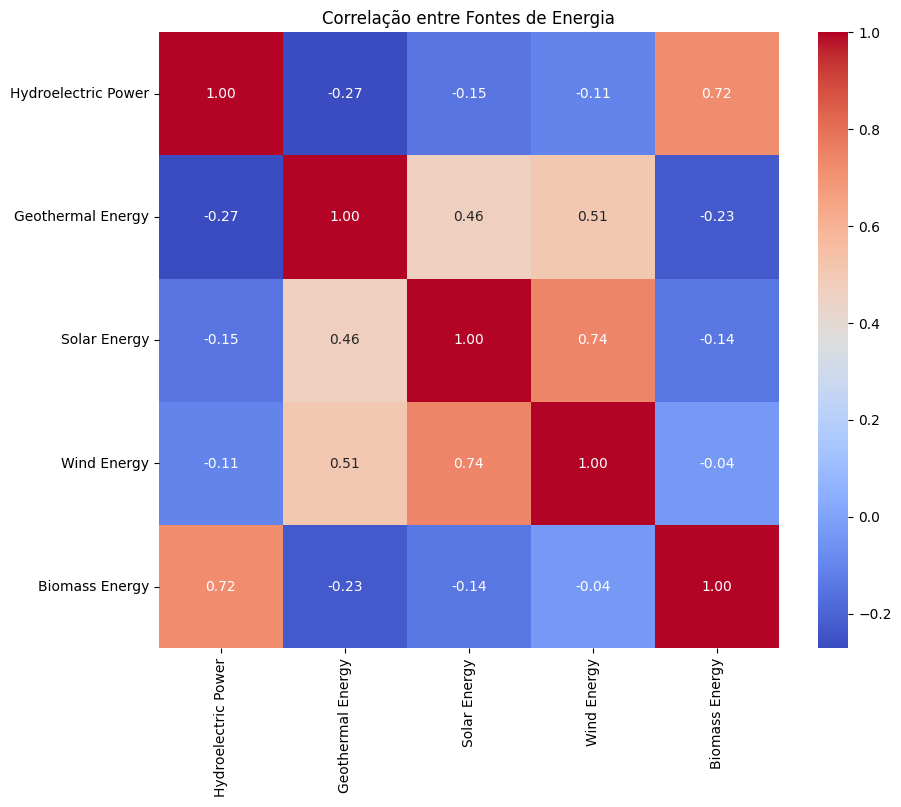

In [15]:
corr = data[fontes].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Fontes de Energia')
plt.show()


# Criando modelos preditivos


In [18]:
# Seleção das variáveis
X = data[['Year', 'Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Biomass Energy']]
y = data['Total Renewable Energy']

# Divisão em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

folder_path = "./models"
folder_exists = check_folder("")
if not folder_exists:
    create_folder(folder_path)
else:
    pickle.dump(model, open(f'{folder_path}/model_energy.pkl', 'wb'))

# Previsão e Avaliação
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 622.0483154739478


## Potenciais Utilidades do Modelo

### O modelo desenvolvido pode ser utilizado de forma estratégica para promover avanços significativos no uso de energia renovável. Abaixo estão algumas formas de aplicação:

- **Previsão de Tendências Futuras**  
  Com base nos dados históricos, o modelo pode projetar a produção de energia renovável em anos futuros. Essas previsões são valiosas para apoiar o planejamento de políticas públicas mais eficientes e para orientar empresas na criação de estratégias sustentáveis e rentáveis.

- **Análise do Impacto de Cada Fonte de Energia**  
  O modelo permite identificar como cada fonte renovável (como solar, eólica e hidrelétrica) contribui para o total de energia produzido. Essa análise ajuda a compreender quais fontes têm maior impacto e quais poderiam ser melhor exploradas ou otimizadas.

- **Promoção da Eficiência Energética**  
  Ao fornecer insights sobre as fontes mais produtivas, o modelo pode ajudar a direcionar investimentos e esforços para áreas que precisam de melhorias ou que têm potencial de crescimento, contribuindo para uma transição energética mais eficiente e sustentável.

De forma geral, o modelo oferece suporte a decisões mais informadas e orientadas para um futuro energético mais limpo e responsável.



## Plot das Previsões x Valores Reais


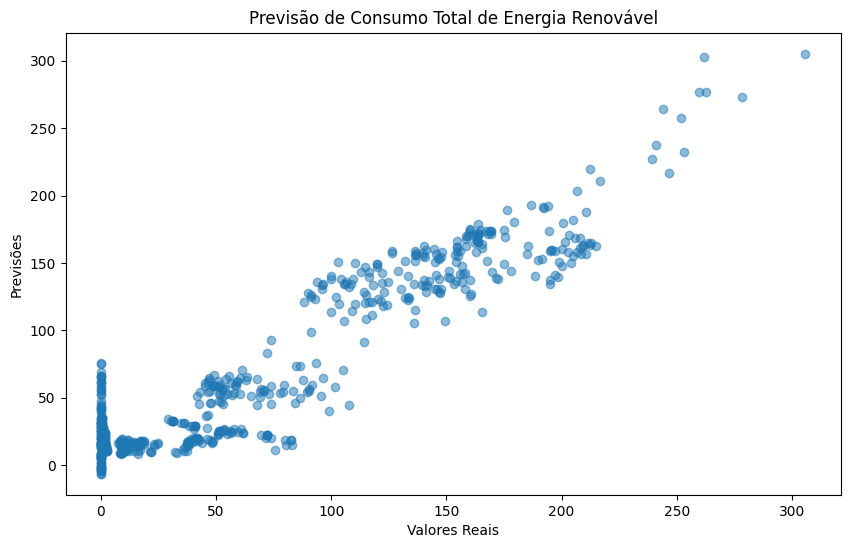

In [ ]:
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsão de Consumo Total de Energia Renovável')
plt.show()


# Modelo de Clusterização para identificar padrões de adoção de tecnologias limpas:


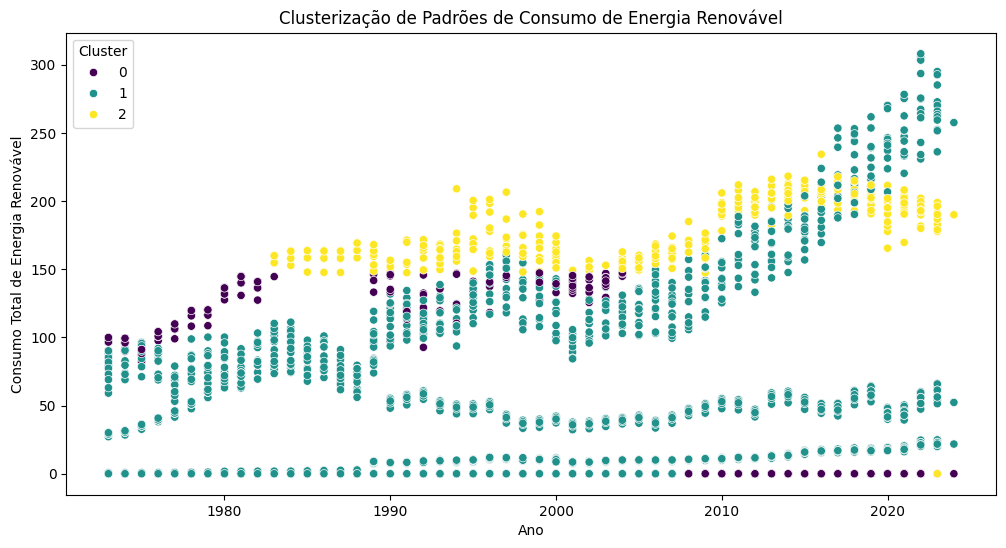

In [ ]:
# Seleção das variáveis para clusterização
X = data[['Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Biomass Energy']]

# Definindo o modelo e o número de clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Adicionar os clusters ao dataframe original
data['Cluster'] = clusters

# Visualização dos clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Year', y='Total Renewable Energy', hue='Cluster', palette='viridis')
plt.title('Clusterização de Padrões de Consumo de Energia Renovável')
plt.xlabel('Ano')
plt.ylabel('Consumo Total de Energia Renovável')
plt.legend(title='Cluster')
plt.show()
